## **IMPORTAR  LIBRERIAS**

In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

sns.set_style("ticks")

## **IMPORTAR LOS CSV**

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Eliminamos las columnas que no necesitamos

In [4]:
train = train.drop(['MSZoning', 'Street', 'LotFrontage', 'Alley', 'MasVnrArea', 'GarageYrBlt', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], axis = 1)

In [5]:
test = test.drop(['MSZoning', 'Street', 'LotFrontage', 'Alley', 'MasVnrArea', 'LotShape', 'GarageYrBlt', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], axis = 1)

### Significado de las columnas que nos quedamos para hacer el modelo

SalePrice - the property's sale price in dollars. This is the **target** variable that you're trying to predict.

MSSubClass: The building class

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Fireplaces: Number of fireplaces

GarageYrBlt: Year garage was built

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

In [6]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,1,3,1,8,0,2,548,0,61,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,3,1,6,1,2,460,298,0,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,1,3,1,6,1,2,608,0,42,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,3,1,7,1,3,642,0,35,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,1,4,1,9,1,3,836,192,84,250000


In [7]:
test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,1,0,2,1,5,0,1.0,730.0,140,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,1,1,3,1,6,0,1.0,312.0,393,36
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,2,1,3,1,6,1,2.0,482.0,212,34
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,2,1,3,1,7,1,2.0,470.0,360,36
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,2,0,2,1,5,0,2.0,506.0,0,82


## **PROYECTO EDA**

### Informacion

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   MSSubClass    1460 non-null   int64
 2   LotArea       1460 non-null   int64
 3   OverallQual   1460 non-null   int64
 4   OverallCond   1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   YearRemodAdd  1460 non-null   int64
 7   BsmtFinSF1    1460 non-null   int64
 8   BsmtFinSF2    1460 non-null   int64
 9   BsmtUnfSF     1460 non-null   int64
 10  TotalBsmtSF   1460 non-null   int64
 11  1stFlrSF      1460 non-null   int64
 12  2ndFlrSF      1460 non-null   int64
 13  LowQualFinSF  1460 non-null   int64
 14  GrLivArea     1460 non-null   int64
 15  BsmtFullBath  1460 non-null   int64
 16  BsmtHalfBath  1460 non-null   int64
 17  FullBath      1460 non-null   int64
 18  HalfBath      1460 non-null   int64
 19  BedroomAbvGr  1460 non-null

In [9]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


### Correlacion

In [10]:
train.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.214479


#### Mapa de correlacion

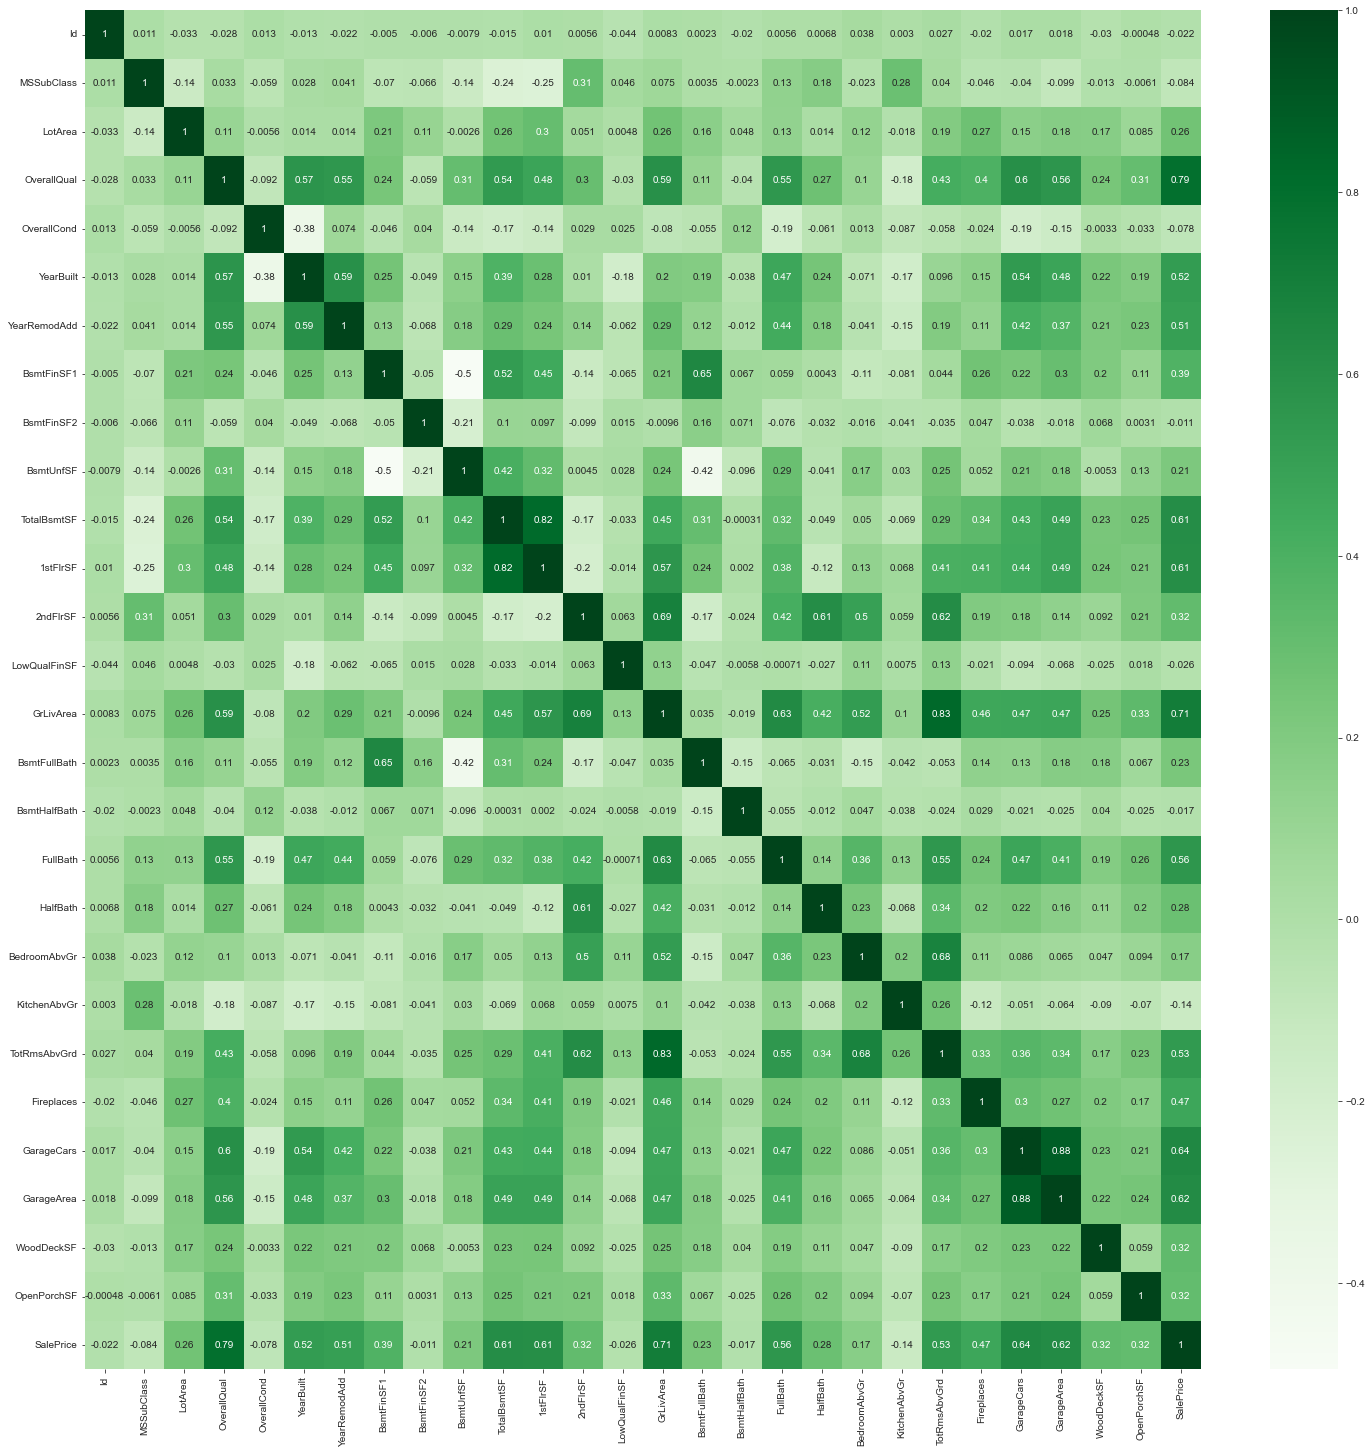

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, linecolor = 'green', cmap = "Greens");

### Gráficas

#### Displot con los precios

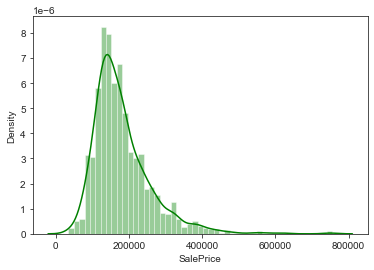

In [12]:
sns.distplot(train['SalePrice'], color = 'green');

#### Scatterplots + regplots con los precios

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

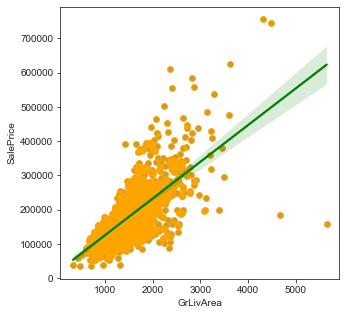

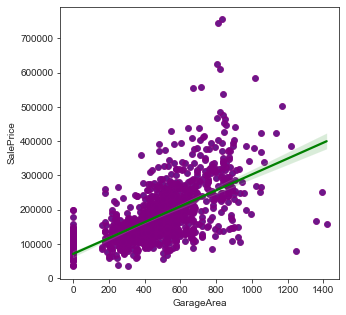

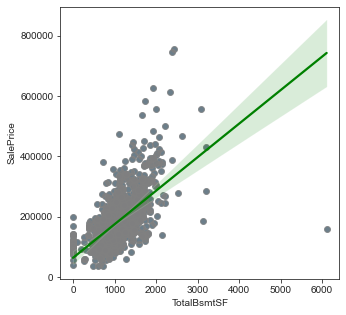

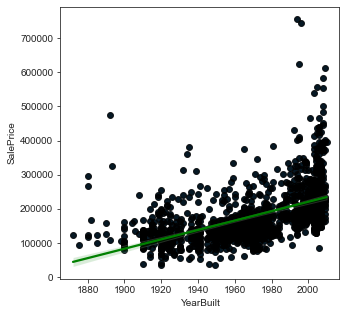

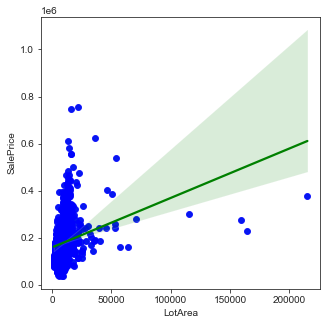

In [13]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = train, x = 'GrLivArea',y = 'SalePrice')
sns.regplot(data = train, x = 'GrLivArea',y = 'SalePrice', color = 'orange', line_kws = {'color':'green'})

plt.figure(figsize = (5,5))
sns.scatterplot(data = train, x = 'GarageArea',y = 'SalePrice')
sns.regplot(data = train, x = 'GarageArea',y = 'SalePrice', color = 'purple', line_kws = {'color':'green'})


plt.figure(figsize = (5,5))
sns.scatterplot(data = train, x = 'TotalBsmtSF',y = 'SalePrice')
sns.regplot(data = train, x = 'TotalBsmtSF',y = 'SalePrice', color = 'grey', line_kws = {'color':'green'})


plt.figure(figsize = (5,5))
sns.scatterplot(data = train, x = 'YearBuilt',y = 'SalePrice')
sns.regplot(data = train, x = 'YearBuilt',y = 'SalePrice', color = 'black', line_kws = {'color':'green'})

plt.figure(figsize = (5,5))
sns.scatterplot(data = train, x = 'LotArea',y = 'SalePrice')
sns.regplot(data = train, x = 'LotArea',y = 'SalePrice', color = 'blue', line_kws = {'color':'green'})

#### Barplots con respecto al precio de la casa

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

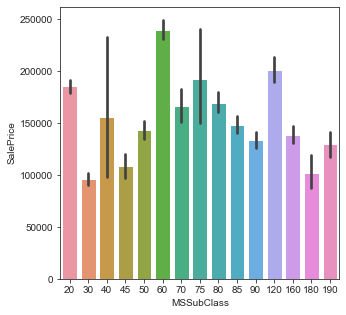

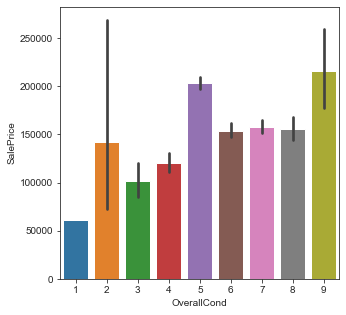

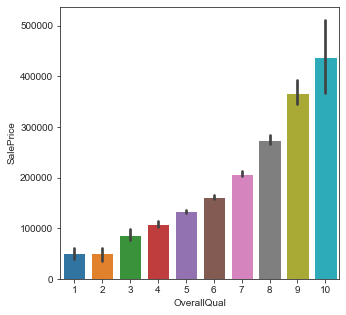

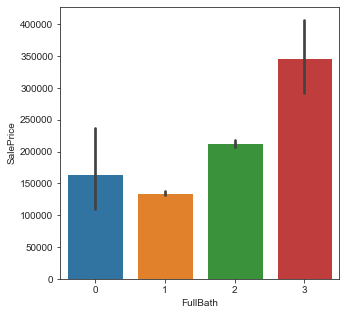

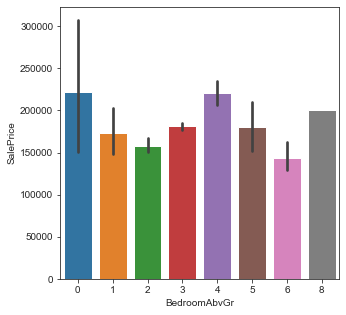

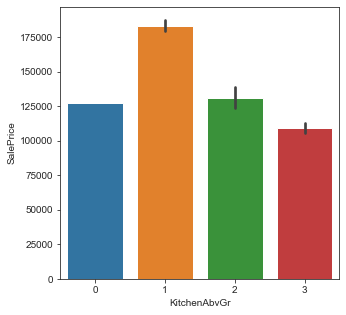

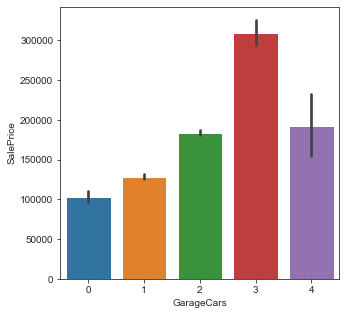

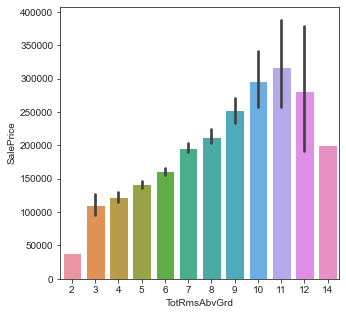

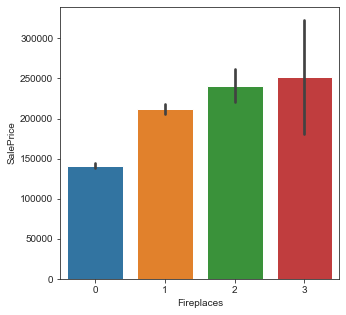

In [14]:
plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "MSSubClass",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "OverallCond",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "OverallQual",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "FullBath",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "BedroomAbvGr",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "KitchenAbvGr",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "GarageCars",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "TotRmsAbvGrd",y = 'SalePrice')

plt.figure(figsize = (5,5))
sns.barplot(data = train, x = "Fireplaces",y = 'SalePrice')

## DIVIDIR EL DATASET EN X E Y

In [15]:
y = train['SalePrice']

X = train.drop(['Id', 'SalePrice'], axis = 1)

In [50]:
X_predict = test.drop(['Id'], axis = 1)

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = X.select_dtypes(include = numerics).columns.values
numerical_features

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype=object)

In [18]:
categorical_features = X.select_dtypes(exclude = numerics).columns.values
categorical_features

array([], dtype=object)

### Missing values

In [19]:
X.columns[X.isnull().any()]

Index([], dtype='object')

In [20]:
X.isnull().sum()

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [21]:
num_impute = SimpleImputer(strategy = 'median')
num_impute.fit(X[numerical_features])

SimpleImputer(strategy='median')

In [22]:
X[numerical_features] = num_impute.transform(X[numerical_features])

In [23]:
num_impute.fit(X[numerical_features])
X[numerical_features] = num_impute.transform(X[numerical_features])
X_test[numerical_features] = num_impute.transform(X_test[numerical_features])

In [24]:
X.columns[X.isnull().any()]

Index([], dtype='object')

### Transformación

In [54]:
num_scale = StandardScaler()

num_scale.fit(X[numerical_features])
X[numerical_features] = num_scale.transform(X[numerical_features])
X_test[numerical_features]=num_scale.transform(X_test[numerical_features])

In [26]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760


### Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1460, 26)
Train features shape: (978, 26)
Train target shape: (978,)
Test features shape: (482, 26)
Test target shape: (482,)


> ## MODELO UNO

### Random Forest

In [28]:
rf = RandomForestRegressor( max_depth = 6, n_estimators = 10, random_state = 0)

### Fit y predicciones

In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [30]:
train_predict = rf.predict(X_train)
train_predict

array([147061.32844128, 132222.69902507, 221975.10711679, 149232.33592454,
       156913.00016573,  95994.31005415, 159255.40642931, 378914.19298842,
       262970.010224  , 169142.19410444, 214654.08324955, 316047.60901443,
       177278.18022576, 199655.71842039, 222292.6495966 , 112911.61909998,
        82694.20814887, 189226.12901399, 479723.70744048,  89610.95165682,
       115661.25626869, 148156.84927577, 177185.16722253, 150630.91174355,
       200869.68839178, 148447.84726142, 217448.6287041 , 119734.88544604,
       190803.71752219, 113500.93347772, 156379.53757187, 278101.71049992,
       129070.48630289, 143323.59646005, 255039.25299802, 100406.58617649,
       266295.35421228, 170191.37633591, 147345.75997212, 174239.84501368,
       183299.97806945, 103342.32641148, 199504.48423084, 199504.48423084,
       180227.07770563, 120274.68544604, 187005.02065862, 138731.34031928,
       268274.86590615, 328352.22109848, 219347.52377039, 176653.36600288,
       277843.2487726 , 1

In [31]:
test_predict = rf.predict(X_test)
test_predict

array([138028.21709449, 316155.87815936, 115438.57009007, 171242.51193817,
       283283.1935739 ,  88720.15122194, 208016.40389941, 166832.35697188,
        91800.15122194, 122584.34601564, 157039.77546071, 113567.30004883,
       100525.15468571, 217448.6287041 , 180998.19155909, 121951.7775513 ,
       187078.98167847, 134379.77760056, 114056.37113504, 199138.74428718,
       161345.01592906, 240124.50185934, 171593.72248077, 117921.31401746,
       188226.11927956, 159103.25940315, 181948.82194917, 106310.29723364,
       178349.36316748, 189634.9091751 , 139794.6998643 , 236528.87010942,
       182021.5247619 , 108970.62614674, 258129.04768426, 148038.88225116,
       151167.01160644, 211606.92606233, 316810.56653986, 107539.32441472,
       133103.96723648, 222152.01536601, 118382.76995308, 353974.43518939,
       138356.60918904, 154632.45534943, 118382.76995308, 119734.88544604,
       378429.24193182, 144776.16230971, 113701.34656196, 180463.93478172,
       124519.6298813 , 3

### Evaluacion

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train , y_train)
ridge_predictions = model_ridge.predict(X_test)

In [33]:
print('MAE train', mean_absolute_error(train_predict, y_train))
print('MAPE train', mean_absolute_percentage_error(train_predict, y_train))
print('MSE train', mean_squared_error(train_predict, y_train, squared = False))
print('RMSE train', np.sqrt(mean_squared_error(train_predict, y_train, squared = False)))
print('R2 score train', r2_score(train_predict, y_train))
print('Explained Variance Score (EVS):',explained_variance_score(train_predict, y_train))
print('R2:',metrics.r2_score(train_predict, y_train))

MAE train 14979.864640266327
MAPE train 0.08625083723430756
MSE train 21448.787669877813
RMSE train 146.4540462734909
R2 score train 0.9035186806224623
Explained Variance Score (EVS): 0.903519278495187
R2: 0.9035186806224623


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE test', mean_absolute_error(test_predict, y_test))
print('MAPE test', mean_absolute_percentage_error(test_predict, y_test))
print('MSE test', mean_squared_error(test_predict, y_test, squared = False))
print('RMSE test', np.sqrt(mean_squared_error(test_predict, y_test, squared = False)))
print('R2 score test', r2_score(test_predict, y_test))
print('Explained Variance Score (EVS):',explained_variance_score(test_predict,y_test))
print('R2:',metrics.r2_score(test_predict, y_test))
print('R2 rounded:',(metrics.r2_score(y_test, ridge_predictions)).round(2))

MAE test 20474.191627503333
MAPE test 0.11287667252420028
MSE test 33936.17174624913
RMSE test 184.21772918546446
R2 score test 0.7652952664480663
Explained Variance Score (EVS): 0.7660160190844632
R2: 0.7652952664480663
R2 rounded: 0.8


### Submission

In [52]:
predictions_rf = rf.predict(X_test)
predictions_rf

array([138028.21709449, 316155.87815936, 115438.57009007, 171242.51193817,
       283283.1935739 ,  88720.15122194, 208016.40389941, 166832.35697188,
        91800.15122194, 122584.34601564, 157039.77546071, 113567.30004883,
       100525.15468571, 217448.6287041 , 180998.19155909, 121951.7775513 ,
       187078.98167847, 134379.77760056, 114056.37113504, 199138.74428718,
       161345.01592906, 240124.50185934, 171593.72248077, 117921.31401746,
       188226.11927956, 159103.25940315, 181948.82194917, 106310.29723364,
       178349.36316748, 189634.9091751 , 139794.6998643 , 236528.87010942,
       182021.5247619 , 108970.62614674, 258129.04768426, 148038.88225116,
       151167.01160644, 211606.92606233, 316810.56653986, 107539.32441472,
       133103.96723648, 222152.01536601, 118382.76995308, 353974.43518939,
       138356.60918904, 154632.45534943, 118382.76995308, 119734.88544604,
       378429.24193182, 144776.16230971, 113701.34656196, 180463.93478172,
       124519.6298813 , 3

In [ ]:
submission_rf = pd.DataFrame({
    'Id' :  train['Id'],
    'SalePrice' : train_predict
})
submission_rf.to_csv('data/new_model_rf.csv', index = False)

> ## MODELO DOS

### Linear Regression

<AxesSubplot:xlabel='SalePrice'>

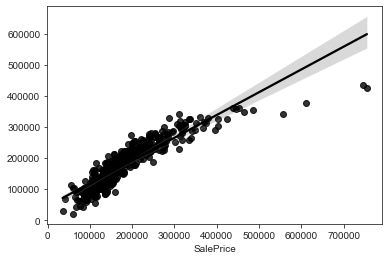

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred, color='black')

### Fit

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
coeficiente_train = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeficiente_train

,Coefficient
MSSubClass,-8513.081641
LotArea,4178.195854
OverallQual,26560.597336
OverallCond,3154.148820
YearBuilt,8325.636112
YearRemodAdd,3882.630220
BsmtFinSF1,2385.084426
BsmtFinSF2,-845.758100
BsmtUnfSF,-860.377665
TotalBsmtSF,1302.065146


### Submission

In [40]:
predictions_lm = lm.predict(X_test)
predictions_lm

array([154123.27731933, 306604.19923858, 119485.281643  , 180555.14579734,
       304911.82126152,  44346.05054118, 229943.2698626 , 154191.8311704 ,
        41409.87074104, 136402.1826892 , 158573.66509241, 117793.72030797,
        90974.89484549, 211835.68859974, 193913.03805717, 144878.7727609 ,
       215464.01889545, 136767.69281752, 125508.05305962, 232508.13317902,
       192190.66097974, 217149.9406848 , 196515.46671107, 123485.33506954,
       214635.44457289, 151391.40894861, 200737.78701712,  92189.49106772,
       188794.59651477, 183100.67598921, 115700.64309659, 272500.03596595,
       237111.12022527,  85629.22530376, 276868.1426753 , 163399.29605404,
       148797.01847305, 218950.59321968, 303896.67747776,  95279.95050441,
       146701.58796566, 254374.14793069, 104032.3728664 , 281627.94816199,
       131689.49203376, 127427.58363501, 106572.08759943, 129748.5001593 ,
       361530.87998144, 127854.42697349, 107658.63697228, 219520.15717628,
        89897.87384764, 3

In [43]:
rf.score(X_test, y_test)

0.8431273179396429

In [41]:
lm.score(X_test, y_test)

0.8015324962213751

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lm))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lm)))

MAE: 23925.73722757474
MSE: 1457027617.5988038
RMSE: 38171.031130934934


#### Escalar

In [45]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
OverallQual,26315.673778
TotRmsAbvGrd,11075.509327
GarageCars,10367.302964
GrLivArea,9973.751766
YearBuilt,8475.814938
1stFlrSF,6758.520955
BsmtFullBath,6609.922642
2ndFlrSF,5718.382711
LotArea,4836.650103
Fireplaces,4050.677181


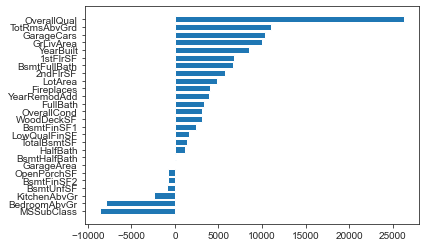

In [46]:
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

In [48]:
import pickle
with open('model/my_model', 'wb') as archivo_salida:
    pickle.dump(rf.base_estimator_, archivo_salida)

In [49]:
with open('model/my_model', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)